# All State Insurance Claim Prediction

#### **This project covered the following concepts:**

<ul>
<li>Breakdown of Business problem</li>
<li>Dataset overview</li>
<li>Exploratory data analysis</li>
<li>Data cleaning and Pre-Processing</li>
<li>Outlier treatment</li>
<li>Feature selection techniques</li>
<li>Ensemble Machine learning models</li>
<li>Hyperparameter tuning</li>
<li>Model validation</li>
<li>Deployment using Flask API</li>
</ul>

#### **Importing the required packages**

In [ ]:
# Installing required packages

!pip install Flask==1.1.2
# !pip install matplotlib==3.3.4
# !pip install numpy==1.20.1
# !pip install pandas==1.3.5
# !pip install scikit_learn==0.24.1
# !pip install seaborn==0.11.1

In [ ]:
# Installing the standard libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import math
import pickle

from zipfile import ZipFile
import urllib.request
from io import BytesIO

# Modifying display options for better dataframe visibility
pd.options.display.max_columns = None

#### **Loading the training data**

In [ ]:
# Downloading the dataset

fileURL = urllib.request.urlopen('https://s3.amazonaws.com/hackerday.datascience/50/dataset.zip')
zipfile = ZipFile(BytesIO(fileURL.read()))
zipfile.namelist()

['test.csv',
 '__MACOSX/',
 '__MACOSX/._test.csv',
 'train.csv',
 '__MACOSX/._train.csv',
 'test_data_subset.csv',
 '__MACOSX/._test_data_subset.csv']

In [ ]:
# Loading the training data

trainData = pd.read_csv(zipfile.open("train.csv"))

In [ ]:
trainData.shape

(188318, 132)

In [ ]:
trainData.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [ ]:
# Inspecting the column names

column_names = np.array(trainData.columns)
print(column_names)

['id' 'cat1' 'cat2' 'cat3' 'cat4' 'cat5' 'cat6' 'cat7' 'cat8' 'cat9'
 'cat10' 'cat11' 'cat12' 'cat13' 'cat14' 'cat15' 'cat16' 'cat17' 'cat18'
 'cat19' 'cat20' 'cat21' 'cat22' 'cat23' 'cat24' 'cat25' 'cat26' 'cat27'
 'cat28' 'cat29' 'cat30' 'cat31' 'cat32' 'cat33' 'cat34' 'cat35' 'cat36'
 'cat37' 'cat38' 'cat39' 'cat40' 'cat41' 'cat42' 'cat43' 'cat44' 'cat45'
 'cat46' 'cat47' 'cat48' 'cat49' 'cat50' 'cat51' 'cat52' 'cat53' 'cat54'
 'cat55' 'cat56' 'cat57' 'cat58' 'cat59' 'cat60' 'cat61' 'cat62' 'cat63'
 'cat64' 'cat65' 'cat66' 'cat67' 'cat68' 'cat69' 'cat70' 'cat71' 'cat72'
 'cat73' 'cat74' 'cat75' 'cat76' 'cat77' 'cat78' 'cat79' 'cat80' 'cat81'
 'cat82' 'cat83' 'cat84' 'cat85' 'cat86' 'cat87' 'cat88' 'cat89' 'cat90'
 'cat91' 'cat92' 'cat93' 'cat94' 'cat95' 'cat96' 'cat97' 'cat98' 'cat99'
 'cat100' 'cat101' 'cat102' 'cat103' 'cat104' 'cat105' 'cat106' 'cat107'
 'cat108' 'cat109' 'cat110' 'cat111' 'cat112' 'cat113' 'cat114' 'cat115'
 'cat116' 'cont1' 'cont2' 'cont3' 'cont4' 'cont5' 'cont

***

#### **Initial Data Exploration**

In [ ]:
# Extracting the data types of each column
dataTypes = trainData.dtypes

# Identifying the data types
categoricalColumns = list(dataTypes[dataTypes=="object"].index.values)
continuousColumns = list(dataTypes[dataTypes=="float64"].index.values)

# Removing the 'loss' column
continuousColumns.remove('loss')

##### check the distribution of categorical variables

In [ ]:
# Defining function to analyse the distribution of categorical values

def category_distribution(trainData,categoricalColumns):
    categoricalColumns_distribution = list()

    for cat_column in categoricalColumns:
        categoricalColumns_distribution.append(trainData[cat_column].value_counts())

    return(categoricalColumns_distribution)

In [ ]:
# Initializing the function
categoricalColumns_distribution = category_distribution(trainData,categoricalColumns)
categoricalColumns_distribution

[A    141550
 B     46768
 Name: cat1, dtype: int64,
 A    106721
 B     81597
 Name: cat2, dtype: int64,
 A    177993
 B     10325
 Name: cat3, dtype: int64,
 A    128395
 B     59923
 Name: cat4, dtype: int64,
 A    123737
 B     64581
 Name: cat5, dtype: int64,
 A    131693
 B     56625
 Name: cat6, dtype: int64,
 A    183744
 B      4574
 Name: cat7, dtype: int64,
 A    177274
 B     11044
 Name: cat8, dtype: int64,
 A    113122
 B     75196
 Name: cat9, dtype: int64,
 A    160213
 B     28105
 Name: cat10, dtype: int64,
 A    168186
 B     20132
 Name: cat11, dtype: int64,
 A    159825
 B     28493
 Name: cat12, dtype: int64,
 A    168851
 B     19467
 Name: cat13, dtype: int64,
 A    186041
 B      2277
 Name: cat14, dtype: int64,
 A    188284
 B        34
 Name: cat15, dtype: int64,
 A    181843
 B      6475
 Name: cat16, dtype: int64,
 A    187009
 B      1309
 Name: cat17, dtype: int64,
 A    187331
 B       987
 Name: cat18, dtype: int64,
 A    186510
 B      1808
 Name: cat1

In [ ]:
# Calculating the unique values in each categorical column

length_categoricalColumns = list(map(lambda x:len(x),categoricalColumns_distribution))

In [ ]:
#Identifying columns with same number of unique values

distribution_dict = dict()
for val in length_categoricalColumns:
    if val in distribution_dict.keys():
        count = distribution_dict[val]
        distribution_dict[val] = count+1
    else:
        distribution_dict[val]=1

print(distribution_dict)

{2: 72, 3: 4, 4: 12, 8: 3, 7: 4, 5: 3, 16: 2, 15: 1, 19: 2, 9: 1, 13: 1, 17: 2, 20: 2, 11: 1, 84: 1, 131: 1, 51: 1, 61: 1, 23: 1, 326: 1}


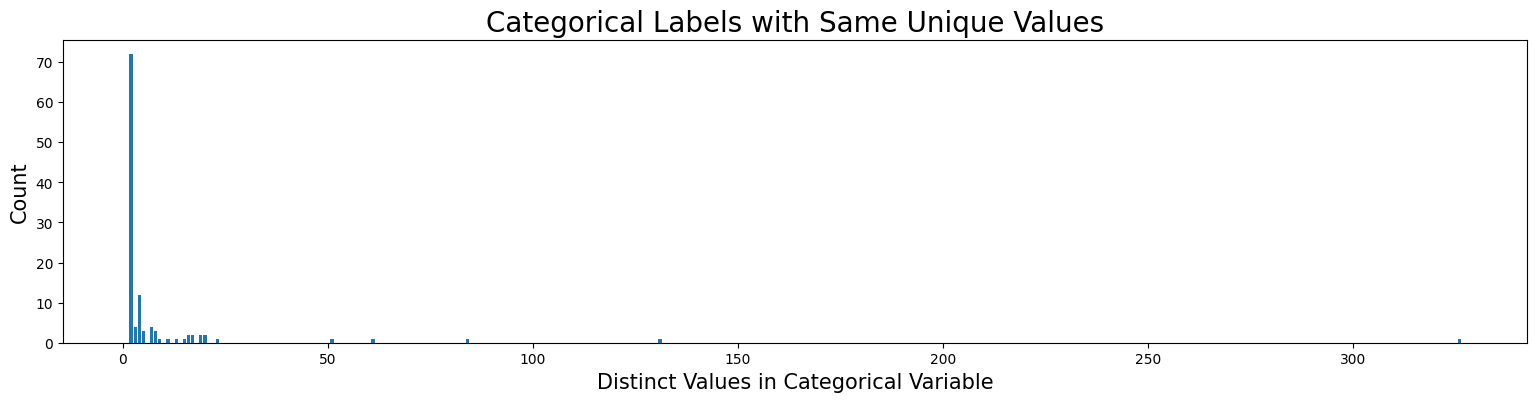

In [ ]:
# Ploting the columns having same number of unique values

keys = distribution_dict.keys()
values = distribution_dict.values()
plt.bar(keys, values,width=0.8)
plt.xlabel('Distinct Values in Categorical Variable', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Categorical Labels with Same Unique Values',fontsize=20)
plt.rcParams['figure.figsize'] = [48/2.54, 10/2.54]
plt.show()

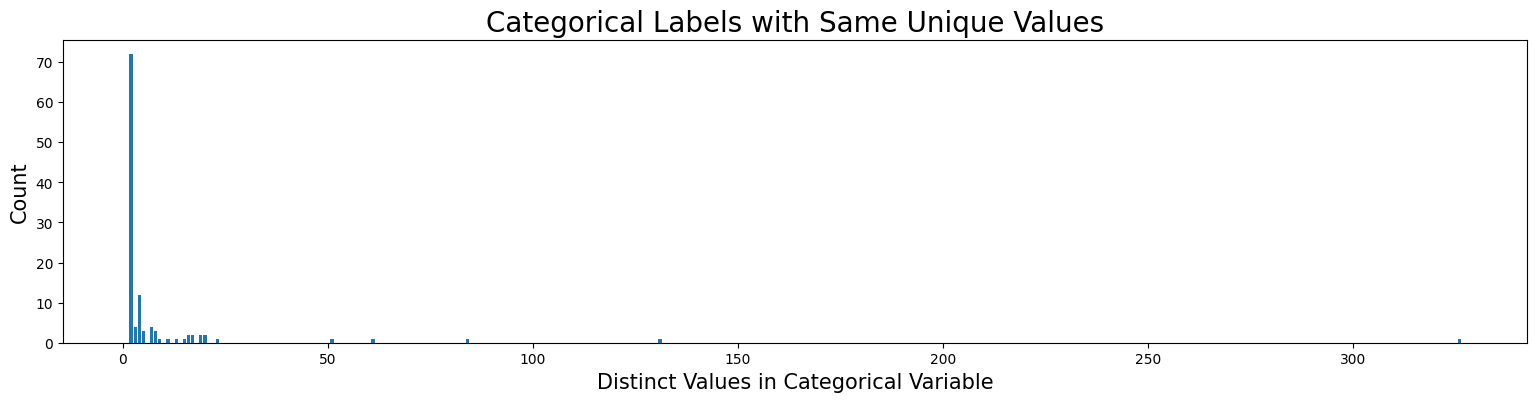

In [ ]:
# Visualizing the distribution of unique values across categorical columns

keys = list(distribution_dict.keys())
values = list(distribution_dict.values())

# Setting the figure size for the plot
plt.figure(figsize=[48/2.54, 10/2.54])

# Creating the bar plot
plt.bar(keys, values, width=0.8)
plt.xlabel('Distinct Values in Categorical Variable', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Categorical Labels with Same Unique Values', fontsize=20)
plt.show()

In [ ]:
# Checking the distribution of continuous variables

trainData[continuousColumns].describe()

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848


***

#### **Data cleaning and Preprocessing**

In [ ]:
# Check for missing values
missing_values = trainData.isnull().sum()
np.max(missing_values)

0

In [ ]:
# Manually inserting null value across 5 rows
total_rows = trainData.shape[0]
blank_catValues = np.random.randint(1,116,2)
blank_contValues = np.random.randint(117,130,3)
blankColumns = np.append(blank_catValues,blank_contValues)

#for every column insert 5 blanks at random locations
for col in blankColumns:
    blankRows = np.random.randint(1,total_rows,5)
    trainData.iloc[blankRows,col] = np.nan

In [ ]:
# Validate the number of columns with missing values
missing_values = trainData.isnull().sum()
np.max(missing_values)

5

In [ ]:
#Displaying the columns with missing values

columns_with_missing = trainData.columns[trainData.isnull().any()]
print(columns_with_missing)

Index(['cat5', 'cat101', 'cont2', 'cont6', 'cont9'], dtype='object')


##### Data Preprocessing class with the following functions:
<ul>
    <li><b>missing_value_continuous</b>: function to handle missing values of continuous variables</li>
    <li><b>missing_value_categorical</b>: function to handle missing values of categorical variables</li>
    <li><b>treat_outliers</b>: function to handle continuous outliers in the dataset</li>
</ul>

In [ ]:
# Defining a class function to handle missing values and outliers

class DataPreprocessing:
    def __init__(self, trainData):
        self.trainData = trainData

    def missing_value_continuous(self, column_names, strategy="mean"):
        """Impute missing values in continuous columns."""
        imputer = SimpleImputer(missing_values=np.nan, strategy=strategy)
        self.trainData[column_names] = imputer.fit_transform(self.trainData[column_names])
        return self.trainData

    def missing_value_categorical(self, column_names):
        """Impute missing values in categorical columns using the most frequent value."""
        imputer = SimpleImputer(strategy="most_frequent")
        self.trainData[column_names] = imputer.fit_transform(self.trainData[column_names])
        return self.trainData

    def treat_outliers(self, Q1, Q3, IQR, columns, action="median"):
        """Treat outliers in the dataset."""
        for column in columns:
            if action in ["median", "mean"]:
                replacement_value = np.median(self.trainData[column]) if action == "median" else np.mean(self.trainData[column])
                outlier_condition = (self.trainData[column] < (Q1[column] - 1.5 * IQR[column])) | (self.trainData[column] > (Q3[column] + 1.5 * IQR[column]))
                self.trainData.loc[outlier_condition, column] = replacement_value
            elif action == "remove":
                self.trainData = self.trainData[~((self.trainData[column] < (Q1[column] - 1.5 * IQR[column])) | (self.trainData[column] > (Q3[column] + 1.5 * IQR[column])))]
        return self.trainData


In [ ]:
# Creating an instance of the DataPreprocessing class
Data_preprocessing_obj = DataPreprocessing(trainData)

# Imputing missing values in continuous columns using the median
trainData = Data_preprocessing_obj.missing_value_continuous(continuousColumns, "median")

# Imputing missing values in categorical columns using the most frequent value
trainData = Data_preprocessing_obj.missing_value_categorical(categoricalColumns)


In [ ]:
#Validate the number of columns with missing values
missing_values = trainData.isnull().sum()
np.max(missing_values)

0

***

#### **Handling outliers**

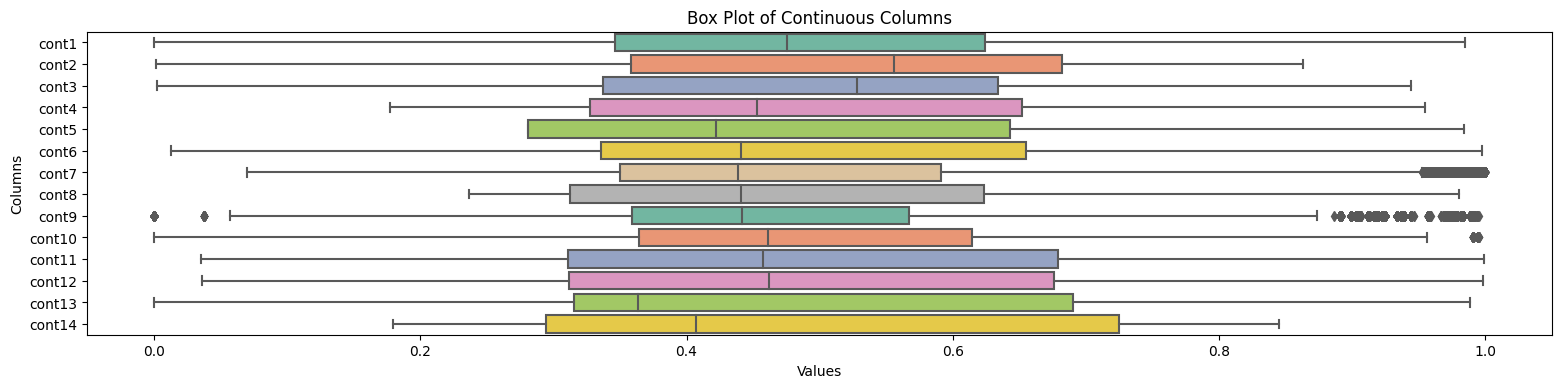

In [ ]:
# Visualizing the outliers

ax = sns.boxplot(data=trainData[continuousColumns], orient="h", palette="Set2")
plt.title("Box Plot of Continuous Columns")
plt.xlabel("Values")
plt.ylabel("Columns")
plt.show()

In [ ]:
outlierColumns = ['cont7','cont9','cont10']

In [ ]:
# Computing the interquartile range for all continuous columns
Q1 = trainData[continuousColumns].quantile(0.25)
Q3 = trainData[continuousColumns].quantile(0.75)
IQR = (Q3-Q1)

# Initializing the outliers method
trainData = Data_preprocessing_obj.treat_outliers(Q1,Q3,IQR,outlierColumns,"median")

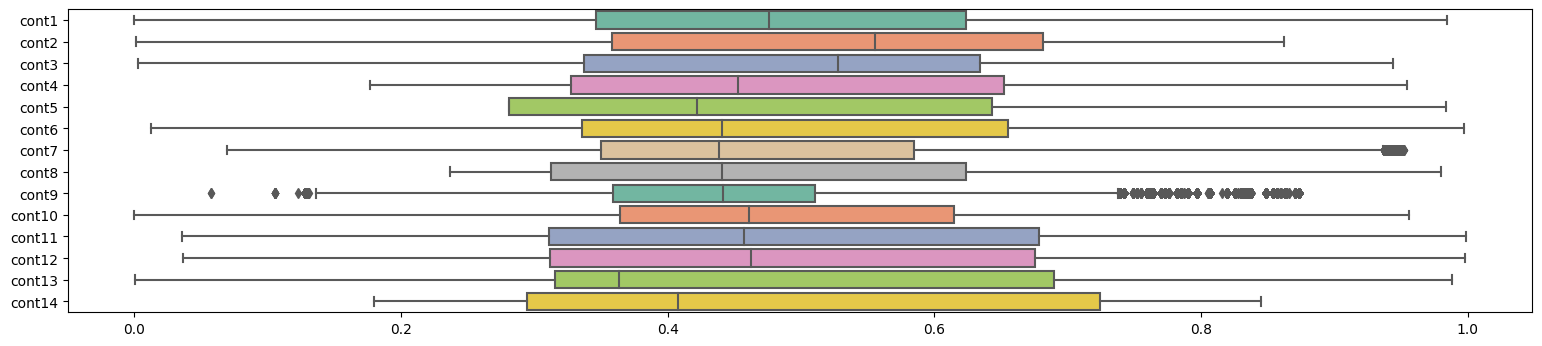

In [ ]:
ax = sns.boxplot(data=trainData[continuousColumns], orient="h", palette="Set2")

***

#### **Visualizing the Output Variable**

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


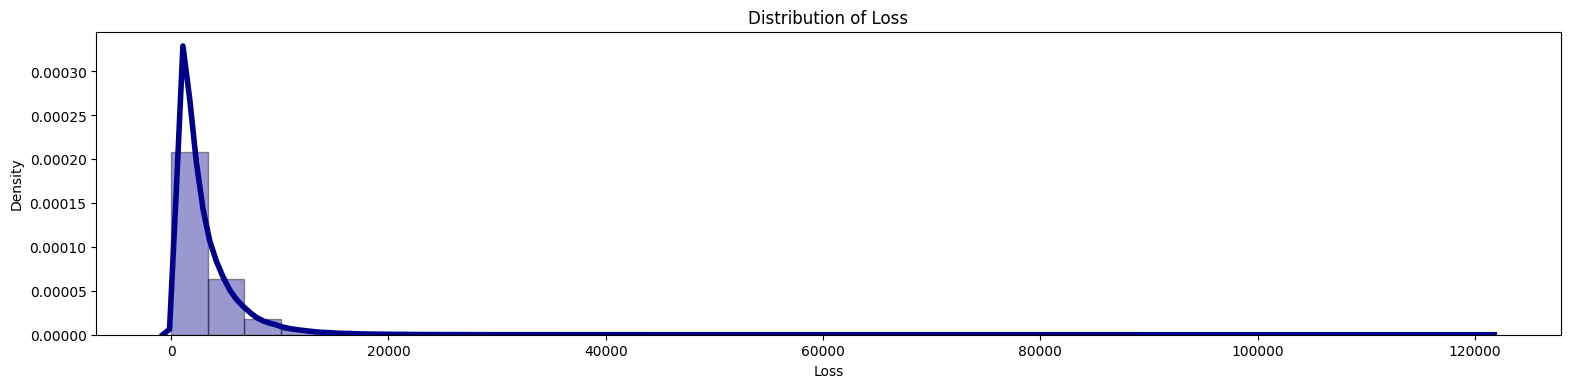

In [ ]:
#Visualizing the distribution of loss values
sns.distplot(trainData['loss'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})


# Adding title and labels for better understanding
plt.title("Distribution of Loss")
plt.xlabel("Loss")
plt.ylabel("Density")
plt.show()

In [ ]:
# Applying logarithm transformation to the 'loss' column

trainData['loss'] = np.log(trainData['loss'])

This transformation helped in normalizing the distribution of the 'loss' data which is particularly useful because it was very skewed.

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


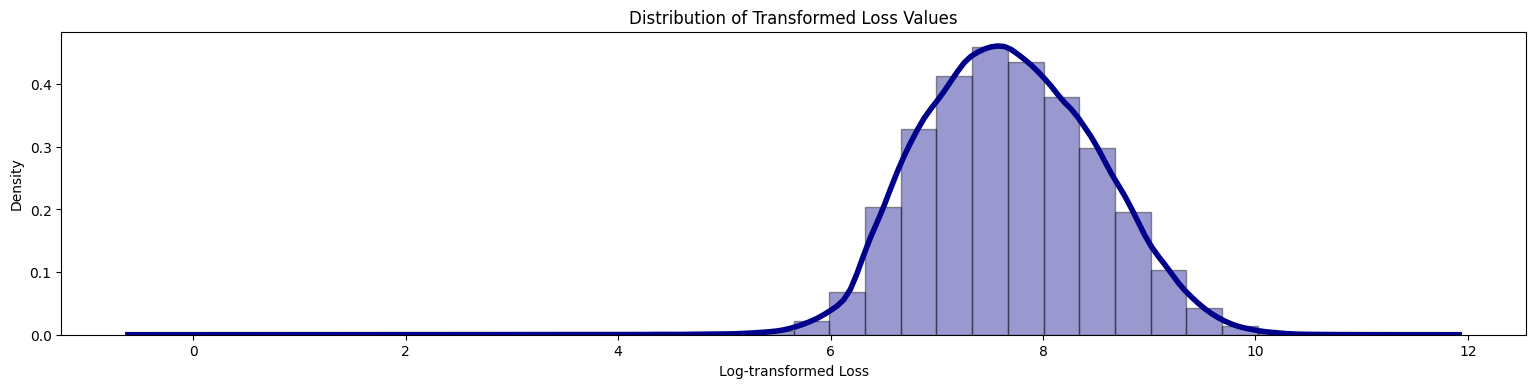

In [ ]:
# Visualizing the distribution of the transformed loss values
sns.distplot(trainData['loss'], hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title("Distribution of Transformed Loss Values")
plt.xlabel("Log-transformed Loss")
plt.ylabel("Density")
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='loss', ylabel='Density'>

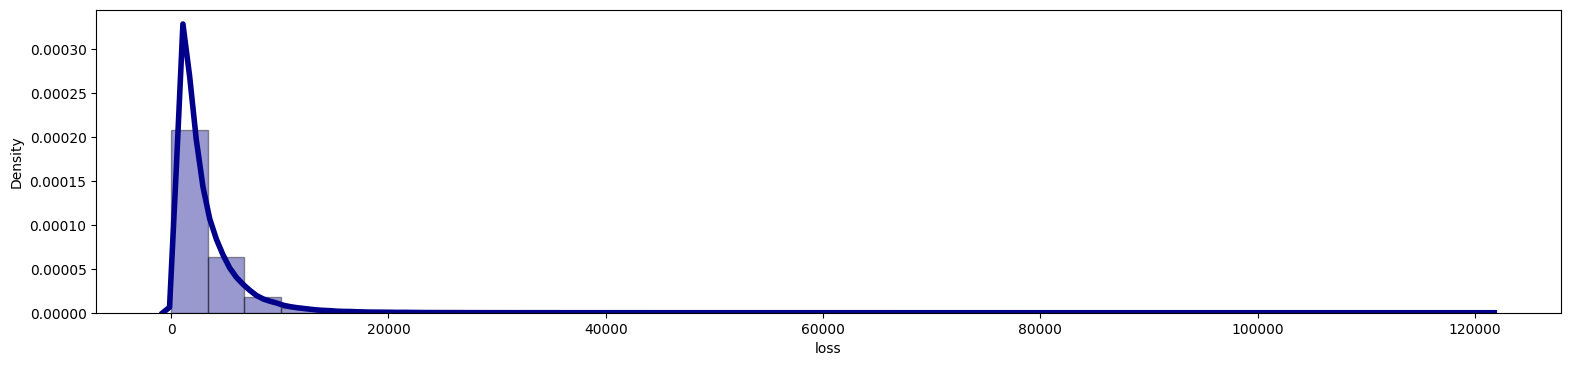

In [ ]:
#Taking an anti-log of the transformed values

sns.distplot(np.exp(trainData['loss']), hist=True, kde=True,
             bins=int(180/5), color = 'darkblue',
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

#### **Feature elimination techniques**

In [ ]:
# Defining a Function for feature selection using Quasi-Constant variance and Correlation

def feature_selection_numerical_variables(trainData,qthreshold,corr_threshold,exclude_numerical_cols_list):

    # Selecting numerical columns and excluding specified columns
    num_colums = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    numerical_columns = list(trainData.select_dtypes(include=num_colums).columns)
    numerical_columns = [column for column in numerical_columns if column not in exclude_numerical_cols_list]

    # Removing variables with constant variance
    constant_filter = VarianceThreshold(threshold=0)
    constant_filter.fit(trainData[numerical_columns])
    constant_columns = [column for column in trainData[numerical_columns].columns
                    if column not in trainData[numerical_columns].columns[constant_filter.get_support()]]
    if len(constant_columns)>0:
        trainData.drop(labels=constant_columns, axis=1, inplace=True)

    # Removing the deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in constant_columns]

    # Removing variables with qconstant variance
    qconstant_filter = VarianceThreshold(threshold=qthreshold)
    qconstant_filter.fit(trainData[numerical_columns])
    qconstant_columns = [column for column in trainData[numerical_columns].columns
                         if column not in trainData[numerical_columns].columns[constant_filter.get_support()]]
    if len(qconstant_columns)>0:
        trainData.drop(labels=qconstant_columns, axis=1, inplace=True)

    # Removing the deleted columns from dataframe
    numerical_columns = [column for column in numerical_columns if column not in qconstant_columns]

    # Removing the correlated variables
    correlated_features = set()
    correlation_matrix = trainData[numerical_columns].corr()
    ax = sns.heatmap(
    correlation_matrix,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right');
    #print(correlation_matrix)

    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
                colname = correlation_matrix.columns[i]
                colcompared = correlation_matrix.columns[j]
                #check if the column compared against is not in the columns excluded list
                if colcompared not in correlated_features:
                    correlated_features.add(colname)

    trainData.drop(labels=correlated_features, axis=1, inplace=True)

    return trainData,constant_columns,qconstant_columns,correlated_features


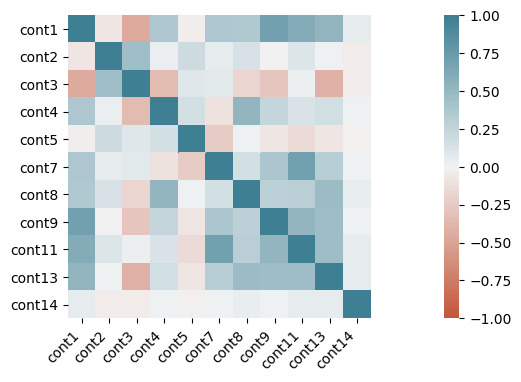

In [ ]:
# Initializing the function

trainData, constant_columns, qconstant_columns, correlated_features = feature_selection_numerical_variables(trainData,0.01,0.75,['loss','id'],)

In [ ]:
correlated_features

set()

##### **Handling correlation between categorical variables**

In [ ]:
# Encoding the categorical columns and saving to disk for later use
for cf1 in categoricalColumns:
    le = LabelEncoder()
    le.fit(trainData[cf1].unique())

    filename = cf1+".sav"
    pickle.dump(le, open(filename, 'wb'))

    # Transforming the column values using the fitted encoder
    trainData[cf1] = le.transform(trainData[cf1])

In [ ]:
# Calculating the unique values within categorical columns
df = pd.DataFrame(columns=["Column_Name", "Count"])
for cat in categoricalColumns:
    unique_value_count = len(trainData[cat].unique())
    df = df.append({'Column_Name': cat, "Count": unique_value_count}, ignore_index=True)

# Getting an array of distinct counts
columns_unique_value = df['Count'].unique()

In [ ]:
# Identifying the dependent/correlated categorical variables and dropping them

columns_to_drop_cat = set()
correlated_columns = dict()

for unique_value_count in columns_unique_value:
    if unique_value_count>1:
        categorical_columns = df.loc[df.Count==unique_value_count,'Column_Name']
        categorical_columns = categorical_columns.reset_index(drop=True)
        columns_length=len(categorical_columns)

        for col in range(columns_length-1):
            column_to_compare = categorical_columns[col]
            columns_compare_against = categorical_columns[(col+1):columns_length]
            chi_scores = chi2(trainData[columns_compare_against],trainData[column_to_compare])

            if column_to_compare not in columns_to_drop_cat:
                columns_to_be_dropped = [i for i in range(len(columns_compare_against)) if chi_scores[1][i]<=0.05]
                columns_to_drop_array = np.array(columns_compare_against)[columns_to_be_dropped]
                correlated_columns[column_to_compare]=columns_to_drop_array
                columns_to_drop_cat.update(columns_to_drop_array)

In [ ]:
# Dropping the identified correlated categorical columns
trainData = trainData.drop(columns_to_drop_cat,axis=1)

In [ ]:
# Creating a record of dropped columns
correlated_features = list(correlated_features)
columns_to_drop_cat = list(columns_to_drop_cat)
columns_to_drop_cat.extend(correlated_features)
columns_to_drop = columns_to_drop_cat.copy()

# Saving the columns_to_drop file to a csv
columns_to_drop_df=pd.DataFrame(columns_to_drop,columns=['colnames'])
columns_to_drop_df.to_csv("columns_to_drop.csv",index=False)

#### **Model Training**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Identifying columns with 'int64' and converting them to categorical

columnDatatypes = trainData.dtypes
integerColumns = list(columnDatatypes.where(lambda x: x =="int64").dropna().index.values)
trainData[integerColumns] = trainData[integerColumns].astype('category',copy=False)

In [ ]:
# Separating the features (X) and the target variable (y)
X,y = trainData.drop(['id','loss'],axis=1),trainData['loss']

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

##### **Random Forest Model**

In [ ]:
# Instantiating a RF model with 100 decision trees
rfModel = RandomForestRegressor(n_estimators = 100, random_state = 42,oob_score = True)

# Fitting the model on the training data
rfModel.fit(X_train, y_train)

RandomForestRegressor(oob_score=True, random_state=42)

In [ ]:
# Running predictions on the test set
rfPred = rfModel.predict(X_test)

In [ ]:
# Saving the model output
pickle.dump(rfModel, open("basemodel_rf", 'wb'))

In [ ]:
# Loading the saved model
basedmodel_rf = pickle.load(open("basemodel_rf", 'rb'))

In [ ]:
# Making predictions on the test set using the loaded model
rfPred2 = basedmodel_rf.predict(X_test)

# Calculating the Root Mean Squared Error (RMSE) for the predictions
rmse = np.sqrt(mean_squared_error(y_test, rfPred2))
print("Base model RMSE:", rmse)

Base model RMSE: 0.6665190853991468


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, rfPred)
r2 = r2_score(y_test, rfPred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.44
R-squared: 0.32


***

##### **HyperParameter Tuning Using RandomSearchCV**
Defining values for hyperparameter tuning

In [ ]:
# Number of trees in the random forest
n_estimators = [100,200,300,400,500]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in each decision tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

# Minimum number of samples required to split a node
min_samples_split = [200,400,600]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Creating a random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
# Initializing the base Regressor model
rf = RandomForestRegressor()

# Setting up RandomizedSearchCV using the random grid for hyperparameter tuning
rf_tuned = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, cv=3, n_iter=5, verbose=2, random_state=42, n_jobs=-1)

# Fitting the model to the training data
rf_tuned.fit(X_train, y_train)

# Saving the tuned model for later use
pickle.dump(rf_tuned, open("tunedmodel_rf", 'wb'))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


In [ ]:
#check the best params
rf_tuned.best_params_

{'n_estimators': 200,
 'min_samples_split': 200,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

In [ ]:
X_train

,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,cat90,cat93,cat94,cat95,cat96,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat108,cat109,cat110,cat112,cat113,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14
31228,0,0,0,0,1,0,3,0,0,0,3,3,2,4,15,8,0,0,0,6,5,10,33,66,30,55,14,179,0.522145,0.681761,0.484196,0.827485,0.696981,0.349390,0.78888,0.53774,0.588753,0.620891,0.801493
75562,1,0,0,0,0,0,3,0,0,0,3,3,2,4,1,5,0,0,0,4,5,0,33,44,36,23,9,85,0.359329,0.737068,0.549770,0.452887,0.560299,0.435614,0.71817,0.36285,0.341813,0.282249,0.363048
40919,0,0,0,0,0,0,3,0,0,0,2,3,3,4,12,11,12,0,0,4,5,3,33,60,19,13,9,151,0.351358,0.737068,0.777587,0.182950,0.281143,0.679346,0.34987,0.40657,0.468839,0.287682,0.729417
41311,0,0,0,0,0,0,3,0,0,0,3,1,3,4,12,1,0,0,2,5,5,1,33,106,35,48,10,169,0.493164,0.245921,0.246911,0.821574,0.811271,0.308785,0.39455,0.39648,0.341813,0.290422,0.385755
102570,0,0,0,0,1,0,3,0,0,0,3,3,3,4,12,8,9,0,0,5,5,3,33,60,46,45,10,161,0.503312,0.555782,0.592681,0.284048,0.281143,0.869185,0.36083,0.53565,0.511698,0.336261,0.294583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0,0,0,0,0,0,3,0,0,0,2,3,4,1,14,6,8,0,0,3,3,8,33,60,39,39,11,35,0.338258,0.737068,0.549770,0.412789,0.643315,0.375150,0.45883,0.29269,0.245410,0.379109,0.295717
103694,0,0,0,0,0,0,3,0,0,0,3,3,3,4,12,11,5,0,0,4,5,1,33,44,50,23,10,85,0.497513,0.785784,0.549770,0.452887,0.499798,0.364454,0.58354,0.44352,0.341813,0.342239,0.433689
131932,1,0,0,0,0,1,3,0,0,0,3,1,3,4,12,10,0,0,0,3,3,1,72,28,6,38,9,72,0.465671,0.100099,0.336963,0.483397,0.281143,0.343200,0.36083,0.36091,0.217678,0.268941,0.220323
146867,1,0,0,0,0,1,3,0,0,0,3,2,2,4,15,8,3,0,0,6,4,10,33,28,19,23,16,175,0.321594,0.299102,0.246911,0.402922,0.281143,0.317681,0.61229,0.34365,0.377724,0.704052,0.732536


In [ ]:
# Loading the saved tuned model
tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

# Predicting on the test data using the loaded model
pred_tunedModel = tunedmodel_rf.predict(X_test)

# Calculating the RMSE for the tuned model predictions
rmse_tuned = np.sqrt(mean_squared_error(y_test, pred_tunedModel))
print("Tuned model accuracy (RMSE):", rmse_tuned)

Tuned model accuracy (RMSE): 0.6524675428130005


##### **Gradiant Boosting Model**

In [227]:
from sklearn.ensemble import GradientBoostingRegressor

#Instatiating the model
GBM_model = GradientBoostingRegressor(
    max_depth=2,
    n_estimators=3,
    learning_rate=1.0)

# Training the model
GBM_model.fit(X_train,y_train)

# Saving the GBM model using pickle
pickle.dump(GBM_model, open("basemodel_GBM", 'wb'))

In [228]:
# Loading the saved model
basemodel_GBM = pickle.load(open("basemodel_GBM", 'rb'))

# Making predictions on the test set
gbm_predictions = basemodel_GBM.predict(X_test)

# Evaluating the model
rmse = np.sqrt(mean_squared_error(y_test, gbm_predictions))
print(f'Root Mean Squared Error (GBM): {rmse}')

Root Mean Squared Error (GBM): 0.700461106924681


#### **Predicting Output on new observations**

In [257]:
testData = pd.read_csv(zipfile.open("test_data_subset.csv"))

In [258]:
testData.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [259]:
# Load the columns to drop file

droppedColumns = pd.read_csv("columns_to_drop.csv")
retainedColumns = set(testData.columns.values) - set(droppedColumns.colnames.values)
testData = testData[retainedColumns]

columnDatatypes = testData.dtypes
categoricalColumns = list(columnDatatypes[columnDatatypes=="object"].index.values)

In [260]:
# Transfer the categorical columns by loading the fit encodings on training data

for cf1 in categoricalColumns:
    filename = cf1+".sav"
    le = pickle.load(open(filename, 'rb'))

    #if a new class is observed, set it to the 0 class
    le_dict = dict(zip(le.classes_, le.transform(le.classes_)))
    testData[cf1] = testData[cf1].apply(lambda x: le_dict.get(x, -1))

In [261]:
test_data_id = testData['id']
testData = testData.drop('id', axis=1)

In [262]:
columnDatatypes = testData.dtypes
integerColumns = list(columnDatatypes.where(lambda x: x =="int64").dropna().index.values)

#Convert the int64 columns to categrical
testData[integerColumns] = testData[integerColumns].astype('category', copy=False)

In [263]:
# load the saved model and predict on the test data

tunedmodel_rf = pickle.load(open("tunedmodel_rf", 'rb'))

In [265]:
# Extract the features used during training
training_features = X_train.columns.tolist()
training_features

['cat1',
 'cat15',
 'cat22',
 'cat32',
 'cat73',
 'cat75',
 'cat77',
 'cat88',
 'cat89',
 'cat90',
 'cat93',
 'cat94',
 'cat95',
 'cat96',
 'cat99',
 'cat100',
 'cat101',
 'cat102',
 'cat103',
 'cat104',
 'cat105',
 'cat108',
 'cat109',
 'cat110',
 'cat112',
 'cat113',
 'cat115',
 'cat116',
 'cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont7',
 'cont8',
 'cont9',
 'cont11',
 'cont13',
 'cont14']

In [266]:
# Subset the test dataset to include only the relevant features
testData_subset = testData[training_features]
testData_subset

,cat1,cat15,cat22,cat32,cat73,cat75,cat77,cat88,cat89,cat90,cat93,cat94,cat95,cat96,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat108,cat109,cat110,cat112,cat113,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont11,cont13,cont14
0,0,0,0,0,0,0,3,0,0,0,3,2,2,4,15,7,6,0,0,6,4,10,33,28,35,23,16,175,0.321594,0.299102,0.246911,0.402922,0.281143,0.317681,0.61229,0.34365,0.377724,0.704052,0.392562
1,0,0,0,0,0,1,3,0,0,0,3,3,3,4,12,1,3,0,0,6,6,1,33,63,32,59,11,179,0.634734,0.620805,0.654310,0.946616,0.836443,0.443760,0.71330,0.51890,0.689039,0.453468,0.208045
2,0,0,0,0,0,0,3,0,1,0,3,3,2,4,1,6,15,0,3,3,4,0,33,67,46,4,10,55,0.290813,0.737068,0.711159,0.412789,0.718531,0.325779,0.29758,0.34365,0.245410,0.258586,0.297232
3,0,0,0,0,0,0,3,0,0,0,3,3,2,4,15,6,0,0,3,4,4,10,33,66,25,9,15,79,0.268622,0.681761,0.592681,0.354893,0.397069,0.342355,0.40028,0.33237,0.348867,0.592264,0.555955
4,1,0,0,0,0,0,3,0,0,0,3,1,3,4,12,0,0,0,0,5,4,1,2,106,30,46,9,169,0.553846,0.299102,0.263570,0.696873,0.302678,0.391833,0.23688,0.43731,0.359572,0.301535,0.825823


In [267]:
# Making predictions on the subset of the test data
Y_test_predict = tunedmodel_rf.predict(testData_subset)

# Adding predictions to the original test dataset
testData['predict_loss'] = Y_test_predict
testData['id'] = test_data_id
testData = testData[['id', 'predict_loss']]

In [268]:
# Printing the data
testData

,id,predict_loss
0,4,7.790230
1,6,7.692165
2,9,9.010010
3,12,8.165852
4,15,7.028777
